# CDF  QQ Plot
* get runtimes data: ``````

In [63]:
#Filtering data based on machine type
import json
import pandas as pd
import numpy as np
import time
import datetime
import dateutil.parser
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import math
from scipy.integrate import quad
from scipy.optimize import curve_fit
import glob
import inspect
import itertools

#Instance types as a dic
def load_all_data(path):
    try:
        text_ = { file.split('\\')[-1].split('.')[0]: np.loadtxt(file) for file in sorted(glob.iglob(path))}
        
    except Exception as msg:
        print(msg)
        raise
    return text_

def plot_for_comparison(all_data, machine_list):
   
    matplotlib.rcParams.update({'font.size': 18})
    fig,ax = plt.subplots()
    colors = itertools.cycle(['r','k', 'brown'])
    for m in machine_list:
        data_to_fit = all_data[m]
        fig.set_size_inches(10,6)
        color=next(colors)
        #ax.scatter(data_to_fit[:,1], data_to_fit[:,2], marker='x',color=color, label=r'')
        ax.scatter(data_to_fit[:,1], data_to_fit[:,2], marker='x', label=m)
        
    ax.set_ylim((0,1))
    ax.set_xlim((0,1))
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x, linestyle='--', color= 'black',label='Perfect Quantile Match')
    ax.legend(fontsize='small')
    ax.set_xlabel("Actual CDF Quantiles")
    ax.set_ylabel("Proposed CDF Quantiles")
    ax.set_title('Blended Exponential')
    #plt.savefig('../graphs/cdf_comparison_3.pdf',bbox_inches='tight')

In [47]:
#Get instance data
all_data = load_all_data('runtime-data-by-group-qq-plot/*.txt')
#all_data

In [29]:
all_data.keys()

dict_keys(['0-4', '12-16', '16-20', '20-24', '4-8', '8-12', 'All data', 'Day', 'Friday', 'Monday', 'Night', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'idle', 'n1-highcpu-16', 'n1-highcpu-2', 'n1-highcpu-32', 'n1-highcpu-4', 'n1-highcpu-64', 'n1-highcpu-8', 'n1-standard-1', 'n1-standard-16', 'n1-standard-2', 'non-idle', 'us-central1-c', 'us-central1-f', 'us-east1-b', 'us-west1-a'])

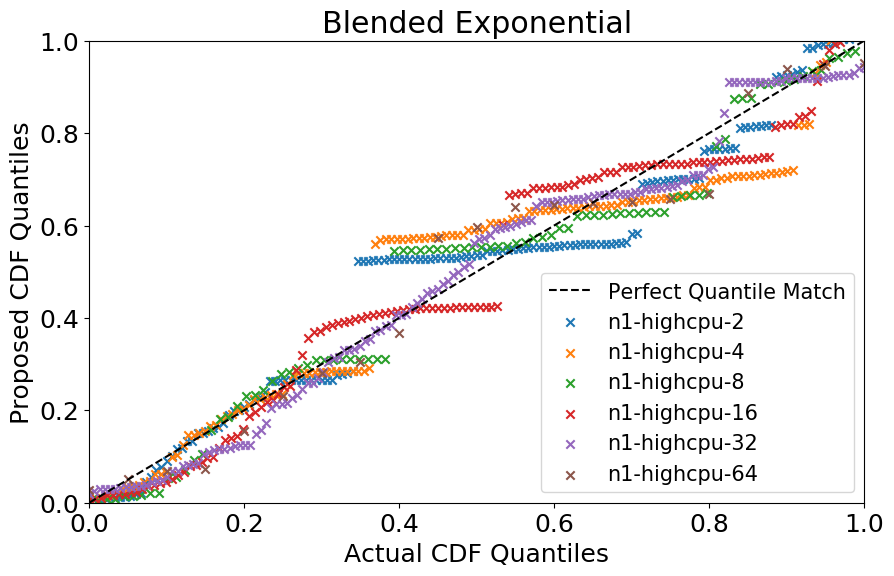

In [65]:
plot_for_comparison(all_data, ['n1-highcpu-2','n1-highcpu-4', 'n1-highcpu-8', 'n1-highcpu-16', 'n1-highcpu-32', 'n1-highcpu-64'])

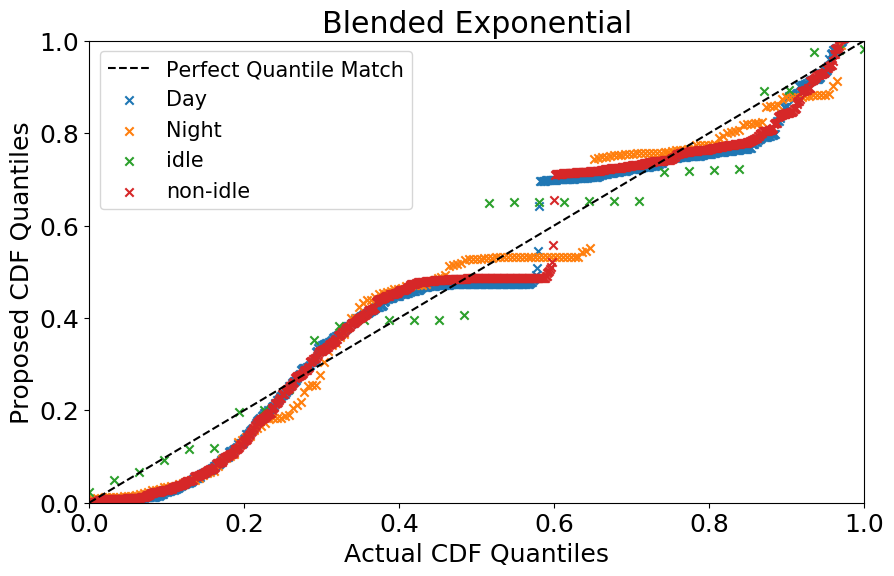

In [67]:
plot_for_comparison(all_data, ['Day', 'Night', 'idle', 'non-idle'])

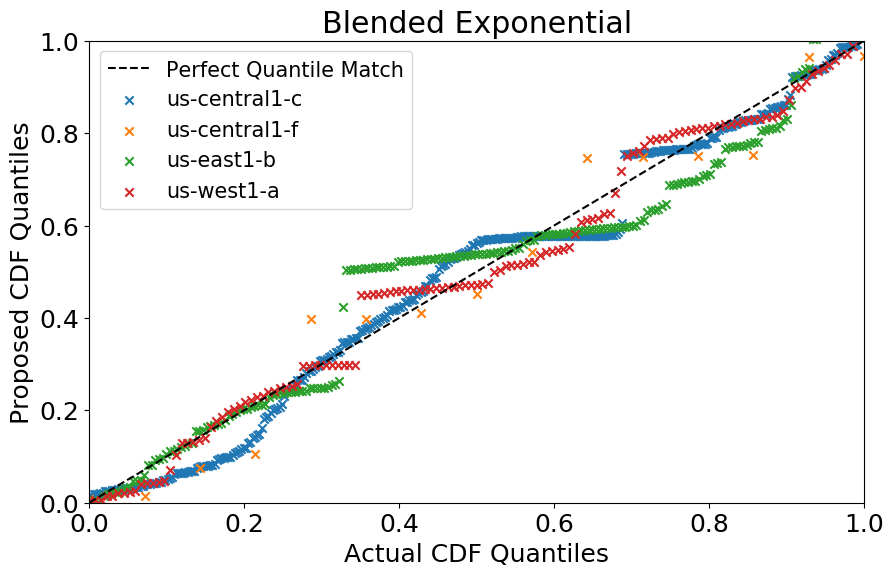

In [68]:
plot_for_comparison(all_data, ['us-central1-c', 'us-central1-f', 'us-east1-b', 'us-west1-a'])